In [1]:
%pylab inline
%run ../wmsrlib/WMSR.py

from scipy.linalg import circulant
import networkx as nx


matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

Populating the interactive namespace from numpy and matplotlib


In [3]:
### Initial conditions

N = 7  # Number of agents
x0 = 10 * np.random.rand(N) + 50  # Random state

K = .03  # Gain factor.
tmax = 500  # Number of time steps.

x0 = 1. * np.array(range(N))
x0 = 100* np.random.rand(N)
x0 = [10., 30., 70., 80., 90., 20., 55.]
x0

[10.0, 30.0, 70.0, 80.0, 90.0, 20.0, 55.0]

In [4]:
### Communication graph
# Adjacency Matrix
a = np.zeros(N)
a[-1], a[1] = 1, 1
A = circulant(a)

# Degree Matrix
D = 2 * np.identity(N)

# Laplacian Matrix https://en.wikipedia.org/wiki/Laplacian_matrix
L = D - A

L

array([[ 2., -1.,  0.,  0.,  0.,  0., -1.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.],
       [-1.,  0.,  0.,  0.,  0., -1.,  2.]])

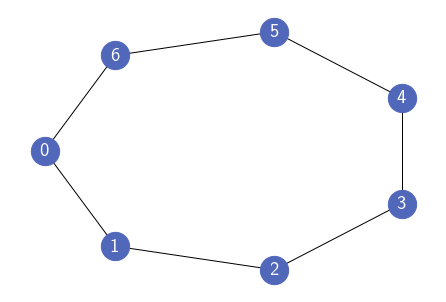

In [5]:
G = nx.from_numpy_matrix(A)
pos = nx.shell_layout(G)
nx.draw(G, pos=pos, with_labels=True, font_color='w', node_color='#5167BA', node_size=800, font_size=20)

plt.savefig('ring.pdf',bbox_inches='tight')

# Average Consensus
For an initial $x(0)$
$$
\dot x_i(t) = \sum_{j\in N_i} a_{ij}(x_j(t) - x_i(t))
$$

In a compact form,
$$
\dot X = - L \: X
$$

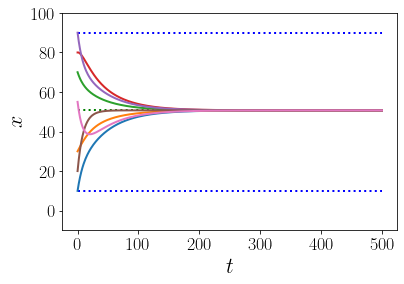

In [6]:
X = np.copy(x0)  # Agents state.
Xlog = [x0]  # Log.

# Consensus
for i in range(tmax):
    X +=  -K * np.dot(L, X)       
    Xlog.append(np.copy(X))
    

# Plot range
def draw_range():
    plt.plot((0,tmax),(np.mean(x0),np.mean(x0)), 'g:',linewidth=2)  # Mean value
    plt.plot((0,tmax),(np.max(x0),np.max(x0)), 'b:',linewidth=2)  # Max value
    plt.plot((0,tmax),(np.min(x0),np.min(x0)), 'b:',linewidth=2)  # Min value
draw_range()
    
Xlog = np.array(Xlog)

# Plot
for x in Xlog.T:
    plot(x, '', linewidth=2)
X

#plt.grid()


plt.xlabel('$t$',fontsize=22)
plt.ylabel('$x$',fontsize=22)

plt.ylim([-10,100])

plt.savefig('normal_consensus.pdf', bbox_inches='tight', pad_inches = 0)


# Malicious agent

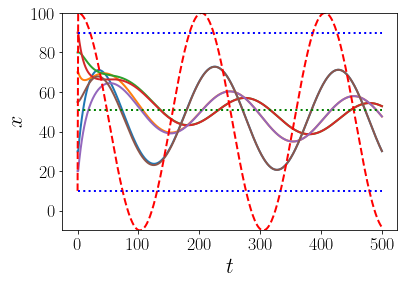

In [7]:
X = np.copy(x0)  # Agents state.
Xlog = [x0]  # Log.

m_id = 0  # Malicious agent id



# Consensus
for i in range(tmax*1):
    
    # Wrong information
    M = np.copy(X)
    M[0] = 100+100*math.sin(i)  # Bad value is shared
    M[0] = -5
    mal = lambda t: 45 + 55 * math.cos(.031 * t)
    # mal = lambda t: val_malicious
    M[0] = mal(i)
    
    U =  np.dot(L, M)  # Sharing bad information
    U[m_id] = np.dot(L[m_id], X)  # Malicious agent behaves properly (its own information is right)
    
    # Control action
    X +=  -K * U
        
    Xlog.append(np.copy(M))
    
Xlog = np.array(Xlog)

# Plot
for x in Xlog.T[1:]:
    plot(x, linewidth=2)
    
# Malicious agent
for x in Xlog.T[:1]:
    plot(x, 'r--', linewidth=2)
    
draw_range()

X

plt.ylim([-10,100])
#plt.grid()

plt.xlabel('$t$',fontsize=22)
plt.ylabel('$x$',fontsize=22)

plt.savefig('manipulated_consensus.pdf', bbox_inches='tight', pad_inches = 0)